In [1]:
import numpy as np
import pandas as pd

In [2]:
ex_home = pd.read_csv('Existing_Home_Sales.csv')

In [3]:
hpi = pd.read_csv('HPI.csv')

In [4]:
sto_qua = pd.read_csv('Stock_Quarterly.csv')

In [5]:
sto_qua.rename(columns = {'Unnamed: 17':'Stock'}, inplace = True)

In [6]:
sto_qua

,Year,Quarter,HS_US,HSVAC_US,HSVACTRND_US,HSVACFR_US,HSVACFS_US,HSVACRS_US,HSVACHOM_US,HSVACOCUSE_US,HSVACURE_US,HSVACOTH_US,HSVACSNL_US,HSOCC_US,HSOWNOCC_US,HSRNTOCC_US,Unnamed: 16,Stock
0,1999,1,118445,13984,10897,3132,1296,835,5634,1955,933,2746,3087,104461,69638,34823,NaN,79655
1,1999,2,119306,14480,11024,3134,1123,1020,5747,1941,1024,2782,3456,104826,69820,35000,NaN,80146
2,1999,3,119595,14455,11041,3163,1136,1112,5630,1967,996,2667,3414,105140,70476,34664,NaN,80656
3,1999,4,118827,13541,10428,3046,1181,856,5345,1929,908,2508,3113,105286,70455,34831,NaN,80094
4,2000,1,119105,13812,10306,2989,1161,748,5408,1858,985,2565,3506,105293,70701,34592,NaN,80776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2021,1,141533,15590,11835,3179,735,940,6981,1973,1225,3783,3754,125944,82578,43366,NaN,94048
89,2021,2,141794,15639,11793,2917,721,1116,7038,1973,1163,3902,3847,126155,82511,43644,NaN,94117
90,2021,3,142100,15185,11671,2722,722,1220,7008,2031,1236,3741,3514,126914,82948,43967,NaN,94192
91,2021,4,142406,14975,11211,2644,726,945,6896,2047,1168,3681,3765,127430,83478,43952,NaN,94865


In [7]:
sto_qua = sto_qua[['Year','Quarter','Stock']]

In [8]:
sto_qua

,Year,Quarter,Stock
0,1999,1,79655
1,1999,2,80146
2,1999,3,80656
3,1999,4,80094
4,2000,1,80776
...,...,...,...
88,2021,1,94048
89,2021,2,94117
90,2021,3,94192
91,2021,4,94865


In [9]:
ex_home['EOM'] = pd.to_datetime(ex_home['EOM'])

In [10]:
ex_home['Year'] = pd.to_datetime(ex_home['EOM']).dt.year
ex_home['Month'] = pd.to_datetime(ex_home['EOM']).dt.month

In [11]:
ex_home

,EOM,EHS,Year,Month
0,1999-01-31,5.23,1999,1
1,1999-02-28,5.10,1999,2
2,1999-03-31,5.15,1999,3
3,1999-04-30,5.08,1999,4
4,1999-05-31,5.19,1999,5
...,...,...,...,...
277,2022-02-28,5.93,2022,2
278,2022-03-31,5.75,2022,3
279,2022-04-30,5.60,2022,4
280,2022-05-31,5.41,2022,5


In [15]:
EHS_Q = pd.DataFrame(ex_home.groupby(ex_home['EOM'].dt.to_period('Q'))['EHS'].agg('sum'))

In [17]:
EHS_Q.reset_index(inplace=True)

In [18]:
EHS_Q

,EOM,EHS
0,1999Q1,15.48
1,1999Q2,15.70
2,1999Q3,15.60
3,1999Q4,15.28
4,2000Q1,15.54
...,...,...
89,2021Q2,17.85
90,2021Q3,18.20
91,2021Q4,18.61
92,2022Q1,18.17


In [19]:
df_f = pd.concat([EHS_Q, sto_qua], axis=1)[['EOM','EHS', 'Stock']]

In [20]:
df_f

,EOM,EHS,Stock
0,1999Q1,15.48,79655.0
1,1999Q2,15.70,80146.0
2,1999Q3,15.60,80656.0
3,1999Q4,15.28,80094.0
4,2000Q1,15.54,80776.0
...,...,...,...
89,2021Q2,17.85,94117.0
90,2021Q3,18.20,94192.0
91,2021Q4,18.61,94865.0
92,2022Q1,18.17,94901.0


In [21]:
df_f['Implied Turnover']  = df_f['EHS']/(df_f['Stock']/1000)

In [51]:
df_f

,EOM,EHS,Stock,Implied Turnover
0,1999Q1,15.48,79655.0,0.194338
1,1999Q2,15.70,80146.0,0.195892
2,1999Q3,15.60,80656.0,0.193414
3,1999Q4,15.28,80094.0,0.190776
4,2000Q1,15.54,80776.0,0.192384
...,...,...,...,...
89,2021Q2,17.85,94117.0,0.189658
90,2021Q3,18.20,94192.0,0.193222
91,2021Q4,18.61,94865.0,0.196174
92,2022Q1,18.17,94901.0,0.191463


In [23]:
hpi

,DATE,PresentHPI,LastYearsHPI
0,1988-01-01,68.859,63.965
1,1988-02-01,69.263,64.424
2,1988-03-01,69.639,64.735
3,1988-04-01,69.977,65.132
4,1988-05-01,70.426,65.565
...,...,...,...
407,2021-12-01,280.152,235.658
408,2022-01-01,284.767,238.772
409,2022-02-01,290.433,241.888
410,2022-03-01,296.572,245.847


In [24]:
hpi['Change of HPI'] = hpi['PresentHPI']/hpi['LastYearsHPI']-1

In [25]:
hpi['DATE']=pd.to_datetime(hpi['DATE'])
hpi

,DATE,PresentHPI,LastYearsHPI,Change of HPI
0,1988-01-01,68.859,63.965,0.076511
1,1988-02-01,69.263,64.424,0.075112
2,1988-03-01,69.639,64.735,0.075755
3,1988-04-01,69.977,65.132,0.074387
4,1988-05-01,70.426,65.565,0.074140
...,...,...,...,...
407,2021-12-01,280.152,235.658,0.188808
408,2022-01-01,284.767,238.772,0.192631
409,2022-02-01,290.433,241.888,0.200692
410,2022-03-01,296.572,245.847,0.206328


In [49]:
hpi = hpi[hpi['DATE']>='1999-01-01']
hpi.reset_index(drop=True, inplace=True)

In [50]:
hpi

,DATE,PresentHPI,LastYearsHPI,Change of HPI
0,1999-01-01,93.208,87.615,0.063836
1,1999-02-01,93.672,88.003,0.064418
2,1999-03-01,94.218,88.442,0.065308
3,1999-04-01,94.785,88.879,0.066450
4,1999-05-01,95.345,89.364,0.066929
...,...,...,...,...
275,2021-12-01,280.152,235.658,0.188808
276,2022-01-01,284.767,238.772,0.192631
277,2022-02-01,290.433,241.888,0.200692
278,2022-03-01,296.572,245.847,0.206328


In [53]:
new_df = df_f.loc[df_f.index.repeat(3)]
new_df.reset_index(drop=True, inplace=True)

In [54]:
new_df

,EOM,EHS,Stock,Implied Turnover
0,1999Q1,15.48,79655.0,0.194338
1,1999Q1,15.48,79655.0,0.194338
2,1999Q1,15.48,79655.0,0.194338
3,1999Q2,15.70,80146.0,0.195892
4,1999Q2,15.70,80146.0,0.195892
...,...,...,...,...
277,2022Q1,18.17,94901.0,0.191463
278,2022Q1,18.17,94901.0,0.191463
279,2022Q2,16.41,NaN,NaN
280,2022Q2,16.41,NaN,NaN


In [59]:
final=pd.concat([new_df, hpi], axis=1)[['DATE', 'Change of HPI','Implied Turnover']]

In [65]:
final_df = final.dropna()

In [66]:
final_df

,DATE,Change of HPI,Implied Turnover
0,1999-01-01,0.063836,0.194338
1,1999-02-01,0.064418,0.194338
2,1999-03-01,0.065308,0.194338
3,1999-04-01,0.066450,0.195892
4,1999-05-01,0.066929,0.195892
...,...,...,...
274,2021-11-01,0.188098,0.196174
275,2021-12-01,0.188808,0.196174
276,2022-01-01,0.192631,0.191463
277,2022-02-01,0.200692,0.191463


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='DATE', ylabel='Change of HPI'>

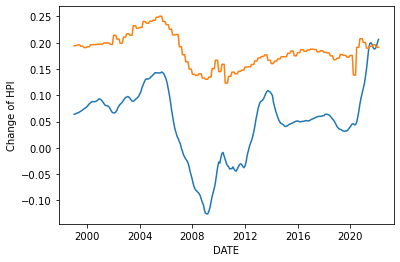

In [78]:
fig, ax = plt.subplots()

sns.lineplot(x = "DATE", y = "Change of HPI",data = final_df, ax=ax)
sns.lineplot(x = "DATE", y = "Implied Turnover",data = final_df, ax=ax)

<AxesSubplot:xlabel='DATE', ylabel='Change of HPI'>